# CREATE TABLE statement

**SYNTAX**
```postgresql
CREATE TABLE [IF NOT EXISTS] table_name (
   column1 datatype(length) column_constraint,
   column2 datatype(length) column_constraint,
   ...
   table_constraints
); 
```

* The table name must be unique in a **schema**.
* If you create a table with a name that already exists, you’ll get an error.
* A **schema** is a named collection of database objects, including tables.
* If you create a table without a **schema**, it defaults to public.
* The `IF NOT EXISTS` option to create a new table only if it does not exist.
* When you use the `IF NOT EXISTS` option and the table already exists, PostgreSQL will issue a notice instead of an error.

**CONSTRAINTS**

PostgreSQL includes the following column constraints:
* `NOT NULL`– ensures that the values in a column cannot be `NULL`.
* `UNIQUE` – ensures the values in a column are unique across the rows within the same table.
* `PRIMARY KEY` – a primary key column uniquely identifies rows in a table. A table can have one and only one primary key. The primary key constraint allows you to define the primary key of a table.
* `CHECK` – ensures the data must satisfy a boolean expression. For example, the value in the price column must be zero or positive.
* `FOREIGN KEY` – ensures that the values in a column or a group of columns from a table exist in a column or group of columns in another table. Unlike the primary key, a table can have many foreign keys.

**EXAMPLE**
```postgresql
CREATE TABLE accounts (
  user_id SERIAL PRIMARY KEY,
  username VARCHAR (50) UNIQUE NOT NULL,
  password VARCHAR (50) NOT NULL,
  email VARCHAR (255) UNIQUE NOT NULL,
  created_at TIMESTAMP NOT NULL,
  last_login TIMESTAMP
); 

```

# SELECT INTO statement

* The PostgreSQL `SELECT INTO` statement creates a new table and inserts data returned from a query into the table.
* The new table will have columns with the same names as the columns of the result set of the query.
* Unlike a regular `SELECT` statement, the `SELECT INTO` statement does not return a result to the client.

**SYNTAX**
```postgresql
SELECT
  select_list
INTO [ TEMPORARY | TEMP ] [ TABLE ] new_table_name
FROM
  table_name
WHERE
  search_condition; 
```

* The `TEMP` or `TEMPORARY` keyword is optional; it allows you to create a temporary table instead.
* The `TABLE` keyword is optional, which enhances the clarity of the statement.

> NOTE:
> * You cannot use the `SELECT INTO` statement in PL/pgSQL because it interprets the `INTO` clause differently.
> * In this case, you can use the `CREATE TABLE AS` statement, which provides more functionality than the `SELECT INTO` statement.

**EXAMPLE**
```postgresql
SELECT
    film_id,
    title,
    length
INTO TEMP TABLE short_film
FROM
    film
WHERE
    length < 60
ORDER BY
    title;


SELECT * FROM short_film
ORDER BY length DESC;
```

# CREATE TABLE AS Statement

The `CREATE TABLE AS` statement creates a new table and fills it with the data returned by a query.

**SYNTAX**
```postgresql
CREATE TABLE new_table_name
AS query;
```

The `TEMPORARY` or `TEMP` keyword allows you to create a temporary table:

```postgresql
CREATE TEMP TABLE new_table_name
AS query;
```

The `UNLOGGED` keyword allows the new table to be created as an unlogged table:

```postgresql
CREATE UNLOGGED TABLE new_table_name
AS query;
```

The columns of the new table will have the names and data types associated with the output columns of the `SELECT` clause of the query.

If you want the table columns to have different names, you can specify the new table columns after the new table name:

```postgresql
CREATE TABLE new_table_name ( column_name_list)
AS query;
```

If you want to avoid an error by creating a new table that already exists, you can use the `IF NOT EXISTS` option as follows:
```postgresql
CREATE TABLE IF NOT EXISTS new_table_name
AS query;
```

**EXAMPLE**
```postgresql
CREATE TABLE IF NOT EXISTS film_rating (rating, film_count)
AS
SELECT
    rating,
    COUNT (film_id)
FROM
    film
GROUP BY
    rating; 
```

# SERIAL pseudo type to create an auto-increment Column

* In PostgreSQL, a sequence is a special kind of database object that generates a sequence of integers.
* A sequence is often used as the primary key column in a table.

When creating a new table, the sequence can be created through the `SERIAL` pseudo-type as follows:
```postgresql
CREATE TABLE table_name(
    id SERIAL
);
```

By assigning the SERIAL pseudo-type to the id column, PostgreSQL performs the following:
* First, create a sequence object and set the next value generated by the sequence as the default value for the column.
* Second, add a `NOT NULL` constraint to the id column because a sequence always generates an integer, which is a non-null value.
* Third, assign the owner of the sequence to the `id` column; as a result, the sequence object is deleted when the `id` column or table is dropped.

**Behind the scenes, the following statement executes**:
```postgresql
CREATE SEQUENCE table_name_id_seq;

CREATE TABLE table_name (
    id integer NOT NULL DEFAULT nextval('table_name_id_seq')
);

ALTER SEQUENCE table_name_id_seq
OWNED BY table_name.id;
```

PostgreSQL provides three serial pseudo-types `SMALLSERIAL`, `SERIAL`, and `BIGSERIAL` with the following characteristics:
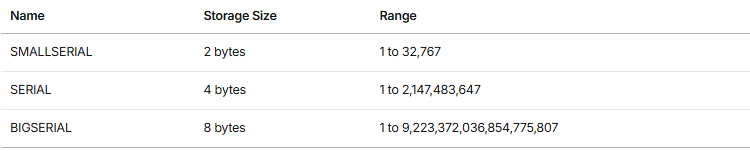

**NOTE**:
* It is important to note that the `SERIAL` does not implicitly create an index on the column or make the column the primary key column.
* However, this can be done easily by specifying the `PRIMARY KEY` constraint for the `SERIAL` column.

To assign a default value to a serial column when inserting a row into the table, you ignore the column name or use the `DEFAULT` keyword in the `INSERT` statement.
```postgresql
INSERT INTO fruits(name)
VALUES('Orange');

INSERT INTO fruits(id,name)
VALUES(DEFAULT,'Apple'); 
```

## Getting the sequence name

To get the sequence name of a `SERIAL` column in a table, you use the `pg_get_serial_sequence()` function as follows:
```postgresql
pg_get_serial_sequence('table_name','column_name')
```

You can pass a sequence name to the `currval()` function to get the recent value generated by the sequence. 

For example, the following statement returns the recent value generated by the `fruits_id_seq object`:
```postgresql
SELECT currval(pg_get_serial_sequence('fruits', 'id')); 
```

## Retrieving the generated value

If you want to get the value generated by the sequence when you insert a new row into the table, you use the `RETURNING id` clause in the `INSERT` statement.

```postgresql
INSERT INTO fruits(name)
VALUES('Banana')
RETURNING id; 
```

# Sequences

* In PostgreSQL, a **sequence** is a database object that allows you to generate a sequence of unique integers.
* Typically, you use a **sequence** to generate a unique identifier for a primary key in a table.
* Additionally, you can use a **sequence** to generate unique numbers across tables.

**SYNTAX**
```postgresql
CREATE SEQUENCE [ IF NOT EXISTS ] sequence_name
    [ AS { SMALLINT | INT | BIGINT } ]
    [ INCREMENT [ BY ] increment ]
    [ MINVALUE minvalue | NO MINVALUE ]
    [ MAXVALUE maxvalue | NO MAXVALUE ]
    [ START [ WITH ] start ]
    [ CACHE cache ]
    [ [ NO ] CYCLE ]
    [ OWNED BY { table_name.column_name | NONE } ]
```
**sequence_name**
* The `IF NOT EXISTS` conditionally creates a new sequence only if it does not exist.
* The **`sequence_name`** must be distinct from any other sequences, tables, indexes, views, or foreign tables in the same schema.

**`[ AS { SMALLINT | INT | BIGINT } ]`**
* Specify the data type of the sequence.
* The valid data types are `SMALLINT`, `INT`, and `BIGINT`.
* The default data type is `BIGINT` if you skip it.
* The data type of the sequence, which determines the sequence’s minimum and maximum values.

**`[ INCREMENT [ BY ] increment ]`**
* The increment specifies which value to add to the current sequence value.
* A positive number will make an ascending sequence, whereas a negative number will form a descending sequence.
* The default increment value is **1**.

**`[ MINVALUE minvalue | NO MINVALUE ]` & `[ MAXVALUE maxvalue | NO MAXVALUE ]`**
* Define the minimum value and maximum value of the sequence.
* If you use `NO MINVALUE` and `NO MAXVALUE`, the sequence will use the default value of the data type of the sequence.
* For an ascending sequence, the default maximum value is the maximum value of the data type of the sequence, and the default minimum value is **1**.
* In the case of a descending sequence, the default maximum value is **-1**, and the default minimum value is the minimum value of the data type of the sequence.

**`[ START [ WITH ] start ]`**
* The `START` clause specifies the starting value of the sequence.
* The default starting value is minvalue for ascending sequences and maxvalue for descending ones.

**`CACHE`**
* The `CACHE` determines how many sequence numbers are preallocated and stored in memory for faster access.
* One value can be generated at a time.
* By default, the sequence generates one value at a time, i.e., **no cache**.

**`CYCLE | NO CYCLE`**
* The CYCLE allows you to restart the value if the limit is reached.
* The next number will be the minimum value for the ascending sequence and the maximum value for the descending sequence.
* If you use `NO CYCLE`, when the limit is reached, attempting to get the next value will result in an error.
* The `NO CYCLE` is the default if you don’t explicitly specify `CYCLE` or `NO CYCLE`.

**`OWNED BY table_name.column_name`**
* The `OWNED BY` clause allows you to associate the table column with the sequence so that when you drop the column or table, PostgreSQL will automatically drop the associated sequence.
* Note that when you use the `SERIAL` pseudo-type for a column of a table, behind the scenes, PostgreSQL automatically creates a sequence associated with the column.


## Creating an ascending sequence example

This statement uses the CREATE SEQUENCE statement to create a new ascending sequence starting from 100 with an increment of 5:

```postgresql
CREATE SEQUENCE mysequence
INCREMENT 5
START 100; 
```

To get the next value from the sequence, you use the `nextval()` function:
```postgresql
SELECT nextval('mysequence');
```

## Creating a descending sequence example

The following statement creates a descending sequence from 3 to 1 with the cycle option:
```postgresql
CREATE SEQUENCE three
INCREMENT -1
MINVALUE 1
MAXVALUE 3
START 3
CYCLE; 
```

When you execute the following statement multiple times, you will see the number starting from 3, 2, 1, and back to 3, 2, 1, and so on:

```postgresql
SELECT nextval('three');
```


## Creating a sequence associated with a table column

```postgresql
CREATE SEQUENCE order_item_id
START 10
INCREMENT 10
MINVALUE 10
OWNED BY order_details.item_id;

INSERT INTO order_details(order_id, item_id, item_text, price)
VALUES
    (100, nextval('order_item_id'),'DVD Player',100),
    (100, nextval('order_item_id'),'Android TV',550),
    (100, nextval('order_item_id'),'Speaker',250);

```

## Listing all sequences in a database

To list all sequences in the current database, you use the following query:
```postgresql
SELECT
    relname sequence_name
FROM
    pg_class
WHERE
    relkind = 'S'; 
```

## Deleting sequences

If a sequence is associated with a table column, it will be automatically dropped once the table column is removed or the table is dropped.

You can also remove a sequence manually using the `DROP SEQUENCE` statement:
```postgresql
DROP SEQUENCE [ IF EXISTS ] sequence_name [, ...]
[ CASCADE | RESTRICT ];
```

* The `IF EXISTS` option conditionally deletes the sequence if it exists.
* If you want to drop multiple sequences at once, you can use a list of comma-separated sequence names.
* Use the `CASCADE` option if you want to drop objects that depend on the sequence recursively, objects that depend on the dependent objects, and so on.